# Q1: Discrete Inverse Transform

In [1]:
function possoinDist(lambda,i)
    return (((lambda ^ i)*(exp(-lambda)))/(factorial(big(i))))
end

possoinDist (generic function with 1 method)

In [2]:
function poissonSampling(lambda)
    x=rand(Uniform(0, 1))
    i=0
    prev=0
    curr=possoinDist(lambda,i)
    while 0<1
        if(prev<x && x<=curr)
            return i
        else
            i=i+1
            # print(i," ")
            prev=curr
            curr=curr+possoinDist(lambda,i)
        end
    end
end

poissonSampling (generic function with 1 method)

In [3]:
println("Discrete Inverse Transform Sampler for Poisson Distribution")
using Distributions

Discrete Inverse Transform Sampler for Poisson Distribution


In [4]:
l=3 #lambda 
global num_samples=10000 #Number of Samples
p=num_samples

10000

In [5]:
Samples=0
global A=[]
while(num_samples>0)
    append!( A, poissonSampling(l) )
    global num_samples=num_samples-1
end

In [6]:
global max=0
for x in A
    if(x>max)
        global max=x
    end
end
global freq=zeros(max+1)
for x in A
    global freq[x+1]=freq[x+1]+1
end

for i in 1:length(freq)
    global freq[i]=freq[i]/p
end

global prob=Float64[]

Float64[]

In [7]:
x_Axis=collect(0:max)
X = Poisson(l)
for t in 0:max
    append!(prob,pdf(X, t))
end

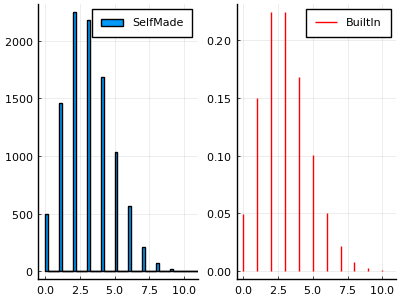

In [8]:
using Plots
using StatsPlots
pyplot(size = (400, 300))

p1=plot(histogram(A,label="SelfMade",xlims=(-0.5,max)))
p2=plot(Poisson(l),color="red",xlims=(-0.5,max),label="BuiltIn")

p3=plot(p1,p2,layout=2)

In [9]:
println("Average is: ", mean(A))
println("Expectation is: ", l)  

println("Variance of selfmade is: ", var(A))
println("Variance of actual is: ", l)  


png("PoissonSamplerQ1.png")


Average is: 3.0189
Expectation is: 3
Variance of selfmade is: 3.01644443444345
Variance of actual is: 3


# Q2 Accept Reject

In [10]:
println("Discrete Accept Reject")
using Distributions

Discrete Accept Reject


In [11]:

function binomialDist(n,p,k)
    return (factorial(big(n)))*(p^k)*((1-p)^(n-k))/(factorial(big(k))*factorial(big(n-k)))
end

binomialDist (generic function with 1 method)

In [12]:
n=10 # n for Binomial
p=0.3 # prob of success for Binomial
global num_samples=10000 # Number of Samples

10000

In [13]:
l=n*p
global c=0
for k in 0:n
    x=exp(l)*factorial(big(n))*(p^k)*((1-p)^(n-k))/((l^k)*(factorial(big(n-k))))
    if x>c
        global c=x+1
    end
end

In [14]:
global binomialSampling=[]
while(num_samples>0)
    u=rand(Uniform(0,1))
    y=poissonSampling(l)
    qy=possoinDist(l,y)
    if(n>=y)
        py=binomialDist(n,p,y)
        if((py/qy) > c)
            println("CHoose bigger c")
            exit()
        end
        if(u<(py/(c*qy)))
            append!(binomialSampling,y)
            global num_samples=num_samples-1
        end
    end
end

In [15]:
println("Average is: ", mean(binomialSampling))
println("Expectation is: ", n*p) 

println("Variance of selfmade is: ", var(binomialSampling))
println("Variance of actual is: ", n*p-n*p^2)


Average is: 2.9857
Expectation is: 3.0
Variance of selfmade is: 2.085904100410036
Variance of actual is: 2.1


In [16]:
global max=0
for x in binomialSampling
    if(x>max)
        global max=x
    end
end

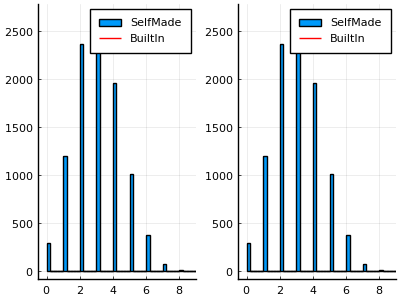

In [17]:
using Plots
using StatsPlots
p1=plot(histogram(binomialSampling,label="SelfMade",xlims=(-0.5,max)))
p2=plot!(Binomial(n,p),color="red",xlims=(-0.5,max),label="BuiltIn")
p3=plot(p1,p2,layout=2)

In [18]:
png("BinomialARQ2.png")